<a href="https://colab.research.google.com/github/bbaryn/exercise_stock_data/blob/main/exercise_stock_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <a name='a1'></a> Import Bibliotek

In [1]:
import numpy as np
import pandas as pd

print(f'Numpy: {np.__version__}')
print(f'Pandas: {pd.__version__}')

Numpy: 1.22.4
Pandas: 1.5.3


### <a name='a2'></a> Załadowanie danych

In [2]:
def fetch_financial_data(company='AMZN'):
    """Pobiera dane dotyczące notowań spółek na giełdzie według symboli
    na serwisie stooq.pl"""
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

df = fetch_financial_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2023-07-03 to 2018-07-05
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1257 non-null   float64
 1   High    1257 non-null   float64
 2   Low     1257 non-null   float64
 3   Close   1257 non-null   float64
 4   Volume  1257 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


### <a name='a3'></a> Eksploracja danych

In [3]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2023-07-03,130.8200,131.8500,130.0650,130.2200,28264785
2023-06-30,129.4700,131.2450,128.9500,130.3600,54350684
2023-06-29,128.7700,129.2600,127.2550,127.9000,40760959
2023-06-28,128.9400,131.4800,128.4400,129.0400,52149512
2023-06-27,128.6300,130.0850,127.5500,129.1800,46801008
...,...,...,...,...,...
2018-07-11,86.8995,87.8480,86.7000,87.7500,64195640
2018-07-10,86.9265,87.5000,86.5500,87.1535,60058100
2018-07-09,86.2025,86.9780,85.8115,86.9510,60239760


In [4]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-07-03,130.82,131.850,130.065,130.22,28264785
2023-06-30,129.47,131.245,128.950,130.36,54350684
2023-06-29,128.77,129.260,127.255,127.90,40760959
2023-06-28,128.94,131.480,128.440,129.04,52149512
2023-06-27,128.63,130.085,127.550,129.18,46801008


In [5]:
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2023-07-03,130.82,131.850,130.065,130.22,28264785
2023-06-30,129.47,131.245,128.950,130.36,54350684
2023-06-29,128.77,129.260,127.255,127.90,40760959


In [6]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2018-07-11,86.8995,87.8480,86.7000,87.7500,64195640
2018-07-10,86.9265,87.5000,86.5500,87.1535,60058100
2018-07-09,86.2025,86.9780,85.8115,86.9510,60239760
2018-07-06,84.8000,85.7635,84.5835,85.5315,53005240
2018-07-05,85.2690,85.5345,84.1075,84.9865,59662200


In [7]:
df.tail(10)

,Open,High,Low,Close,Volume
Date,,,,,
2018-07-18,92.4000,92.9440,91.5635,92.1460,97238260
2018-07-17,90.5780,92.5845,89.8690,92.1965,113657620
2018-07-16,91.0975,92.0975,90.7225,91.1245,109323900
2018-07-13,90.1965,90.7650,89.7615,90.6515,87733580
2018-07-12,88.2255,89.9000,88.1090,89.8310,90654860
2018-07-11,86.8995,87.8480,86.7000,87.7500,64195640
2018-07-10,86.9265,87.5000,86.5500,87.1535,60058100
2018-07-09,86.2025,86.9780,85.8115,86.9510,60239760
2018-07-06,84.8000,85.7635,84.5835,85.5315,53005240


In [9]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [11]:
df.columns = [col.lower() for col in df.columns]
df.head()

,open,high,low,close,volume
Date,,,,,
2023-07-03,130.82,131.850,130.065,130.22,28264785
2023-06-30,129.47,131.245,128.950,130.36,54350684
2023-06-29,128.77,129.260,127.255,127.90,40760959
2023-06-28,128.94,131.480,128.440,129.04,52149512
2023-06-27,128.63,130.085,127.550,129.18,46801008


In [12]:
df.describe()

,open,high,low,close,volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,122.912230,124.438000,121.257597,122.857643,8.279662e+07
std,33.132357,33.444377,32.752854,33.056680,3.824173e+07
min,67.300000,69.801500,65.350000,67.198000,1.762674e+07
25%,92.670000,93.737500,91.533000,92.766000,5.702326e+07
50%,113.850000,116.250000,112.450000,114.330000,7.147291e+07
75%,158.338000,159.938000,156.250000,158.100000,9.761416e+07
max,187.200000,188.654000,184.840000,186.570000,3.113457e+08


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,1257.0,1.229122e+02,3.313236e+01,6.730000e+01,9.267000e+01,113.85,1.583380e+02,1.872000e+02
high,1257.0,1.244380e+02,3.344438e+01,6.980150e+01,9.373750e+01,116.25,1.599380e+02,1.886540e+02
low,1257.0,1.212576e+02,3.275285e+01,6.535000e+01,9.153300e+01,112.45,1.562500e+02,1.848400e+02
close,1257.0,1.228576e+02,3.305668e+01,6.719800e+01,9.276600e+01,114.33,1.581000e+02,1.865700e+02
volume,1257.0,8.279662e+07,3.824173e+07,1.762674e+07,5.702326e+07,71472908.00,9.761416e+07,3.113457e+08


### <a name='a4'></a> Selekcja kolumn

In [15]:
df = df.head(10)
df

,open,high,low,close,volume
Date,,,,,
2023-07-03,130.82,131.850,130.065,130.22,28264785
2023-06-30,129.47,131.245,128.950,130.36,54350684
2023-06-29,128.77,129.260,127.255,127.90,40760959
2023-06-28,128.94,131.480,128.440,129.04,52149512
2023-06-27,128.63,130.085,127.550,129.18,46801008
2023-06-26,130.27,131.490,127.100,127.33,59989317
2023-06-23,129.11,130.840,128.280,129.33,71927776
2023-06-22,125.31,130.330,125.140,130.15,90354572
2023-06-21,125.64,126.730,123.850,124.83,52137670


In [16]:
df['open']

Date
2023-07-03    130.82
2023-06-30    129.47
2023-06-29    128.77
2023-06-28    128.94
2023-06-27    128.63
2023-06-26    130.27
2023-06-23    129.11
2023-06-22    125.31
2023-06-21    125.64
2023-06-20    124.97
Name: open, dtype: float64

In [17]:
df.open

Date
2023-07-03    130.82
2023-06-30    129.47
2023-06-29    128.77
2023-06-28    128.94
2023-06-27    128.63
2023-06-26    130.27
2023-06-23    129.11
2023-06-22    125.31
2023-06-21    125.64
2023-06-20    124.97
Name: open, dtype: float64

In [18]:
df[['open']]

,open
Date,
2023-07-03,130.82
2023-06-30,129.47
2023-06-29,128.77
2023-06-28,128.94
2023-06-27,128.63
2023-06-26,130.27
2023-06-23,129.11
2023-06-22,125.31
2023-06-21,125.64


In [19]:
df[['open', 'close']]

,open,close
Date,,
2023-07-03,130.82,130.22
2023-06-30,129.47,130.36
2023-06-29,128.77,127.90
2023-06-28,128.94,129.04
2023-06-27,128.63,129.18
2023-06-26,130.27,127.33
2023-06-23,129.11,129.33
2023-06-22,125.31,130.15
2023-06-21,125.64,124.83


In [20]:
df.iloc[:, 0]

Date
2023-07-03    130.82
2023-06-30    129.47
2023-06-29    128.77
2023-06-28    128.94
2023-06-27    128.63
2023-06-26    130.27
2023-06-23    129.11
2023-06-22    125.31
2023-06-21    125.64
2023-06-20    124.97
Name: open, dtype: float64

In [21]:
df.iloc[:, [0, 3]]

,open,close
Date,,
2023-07-03,130.82,130.22
2023-06-30,129.47,130.36
2023-06-29,128.77,127.90
2023-06-28,128.94,129.04
2023-06-27,128.63,129.18
2023-06-26,130.27,127.33
2023-06-23,129.11,129.33
2023-06-22,125.31,130.15
2023-06-21,125.64,124.83


In [22]:
df.iloc[:, 3:5]

,close,volume
Date,,
2023-07-03,130.22,28264785
2023-06-30,130.36,54350684
2023-06-29,127.90,40760959
2023-06-28,129.04,52149512
2023-06-27,129.18,46801008
2023-06-26,127.33,59989317
2023-06-23,129.33,71927776
2023-06-22,130.15,90354572
2023-06-21,124.83,52137670


In [23]:
df.iloc[:, -1]

Date
2023-07-03    28264785
2023-06-30    54350684
2023-06-29    40760959
2023-06-28    52149512
2023-06-27    46801008
2023-06-26    59989317
2023-06-23    71927776
2023-06-22    90354572
2023-06-21    52137670
2023-06-20    56930122
Name: volume, dtype: int64

In [24]:
df.iloc[:, [-1]]

,volume
Date,
2023-07-03,28264785
2023-06-30,54350684
2023-06-29,40760959
2023-06-28,52149512
2023-06-27,46801008
2023-06-26,59989317
2023-06-23,71927776
2023-06-22,90354572
2023-06-21,52137670


In [25]:
df.iloc[:, -3:]

,low,close,volume
Date,,,
2023-07-03,130.065,130.22,28264785
2023-06-30,128.950,130.36,54350684
2023-06-29,127.255,127.90,40760959
2023-06-28,128.440,129.04,52149512
2023-06-27,127.550,129.18,46801008
2023-06-26,127.100,127.33,59989317
2023-06-23,128.280,129.33,71927776
2023-06-22,125.140,130.15,90354572
2023-06-21,123.850,124.83,52137670


### <a name='a5'></a>  Selekcja wierszy

In [38]:
df

,open,high,low,close,volume
Date,,,,,
2023-07-03,130.82,131.850,130.065,130.22,28264785
2023-06-30,129.47,131.245,128.950,130.36,54350684
2023-06-29,128.77,129.260,127.255,127.90,40760959
2023-06-28,128.94,131.480,128.440,129.04,52149512
2023-06-27,128.63,130.085,127.550,129.18,46801008
2023-06-26,130.27,131.490,127.100,127.33,59989317
2023-06-23,129.11,130.840,128.280,129.33,71927776
2023-06-22,125.31,130.330,125.140,130.15,90354572
2023-06-21,125.64,126.730,123.850,124.83,52137670


In [27]:
df.iloc[0]

open      1.308200e+02
high      1.318500e+02
low       1.300650e+02
close     1.302200e+02
volume    2.826478e+07
Name: 2023-07-03 00:00:00, dtype: float64

In [28]:
df.iloc[:3]

,open,high,low,close,volume
Date,,,,,
2023-07-03,130.82,131.850,130.065,130.22,28264785
2023-06-30,129.47,131.245,128.950,130.36,54350684
2023-06-29,128.77,129.260,127.255,127.90,40760959


In [29]:
df

,open,high,low,close,volume
Date,,,,,
2023-07-03,130.82,131.850,130.065,130.22,28264785
2023-06-30,129.47,131.245,128.950,130.36,54350684
2023-06-29,128.77,129.260,127.255,127.90,40760959
2023-06-28,128.94,131.480,128.440,129.04,52149512
2023-06-27,128.63,130.085,127.550,129.18,46801008
2023-06-26,130.27,131.490,127.100,127.33,59989317
2023-06-23,129.11,130.840,128.280,129.33,71927776
2023-06-22,125.31,130.330,125.140,130.15,90354572
2023-06-21,125.64,126.730,123.850,124.83,52137670


In [73]:
df.loc['2023-06-23' : '2023-07-03']

,open,high,low,close,volume
Date,,,,,
2023-06-23,129.11,130.840,128.280,129.33,71927776
2023-06-26,130.27,131.490,127.100,127.33,59989317
2023-06-27,128.63,130.085,127.550,129.18,46801008
2023-06-28,128.94,131.480,128.440,129.04,52149512
2023-06-29,128.77,129.260,127.255,127.90,40760959
2023-06-30,129.47,131.245,128.950,130.36,54350684
2023-07-03,130.82,131.850,130.065,130.22,28264785


### <a name='a6'></a> Obliczanie nowych kolumn

In [74]:
df = fetch_financial_data('UBER')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1044 entries, 2023-07-03 to 2019-05-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1044 non-null   float64
 1   High    1044 non-null   float64
 2   Low     1044 non-null   float64
 3   Close   1044 non-null   float64
 4   Volume  1044 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 48.9 KB


In [75]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-07-03,43.17,43.4000,42.58,43.09,7578076
2023-06-30,43.11,43.4299,42.92,43.17,17589240
2023-06-29,44.09,44.2800,42.11,42.58,28595285
2023-06-28,43.50,45.2400,43.32,44.24,28187374
2023-06-27,44.69,44.8300,43.75,43.83,29652066


In [77]:
df.describe()

,Open,High,Low,Close,Volume
count,1044.000000,1044.000000,1044.000000,1044.000000,1.044000e+03
mean,37.102076,37.856619,36.291085,37.077011,2.539654e+07
std,9.436280,9.512807,9.287566,9.380333,1.630626e+07
min,15.960000,17.800000,13.710000,14.820000,3.380003e+06
25%,30.247500,30.889975,29.558475,30.267500,1.594760e+07
50%,34.745000,35.305850,33.930000,34.680000,2.167306e+07
75%,43.562500,44.282500,42.820025,43.467500,3.021246e+07
max,63.250000,64.050000,60.800000,63.180000,1.863225e+08


In [78]:
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2023-07-03,43.17,43.4000,42.58,43.09,7578076
2023-06-30,43.11,43.4299,42.92,43.17,17589240
2023-06-29,44.09,44.2800,42.11,42.58,28595285


In [82]:
df['Average'] = (df['Open'] + df['Close']) / 2.0
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2023-07-03,43.17,43.4000,42.58,43.09,7578076,43.130
2023-06-30,43.11,43.4299,42.92,43.17,17589240,43.140
2023-06-29,44.09,44.2800,42.11,42.58,28595285,43.335
2023-06-28,43.50,45.2400,43.32,44.24,28187374,43.870
2023-06-27,44.69,44.8300,43.75,43.83,29652066,44.260


In [84]:
df = df.sort_index()
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240


In [85]:
df[['Close']].shift(1)

,Close
Date,
2019-05-10,NaN
2019-05-13,41.57
2019-05-14,37.10
2019-05-15,39.96
2019-05-16,41.29
...,...
2023-06-27,44.42
2023-06-28,43.83
2023-06-29,44.24


In [87]:
df['Close_shift'] = df.Close.shift(1)
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift
Date,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29


In [93]:
df['Daily_Change'] = (df.Close / df.Close_shift - 1) * 100
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change,Daily Change
Date,,,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN,NaN,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57,-10.752947,-10.752947
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,7.708895,7.708895
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,3.328328,3.328328
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,4.141439,4.141439


In [94]:
del df['Daily Change']

In [95]:
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57,-10.752947
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,7.708895
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,3.328328
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,4.141439


In [96]:
df.Daily_Change.min()

-21.628767847699628

In [97]:
df.Daily_Change.max()

38.25910931174088

<Axes: >

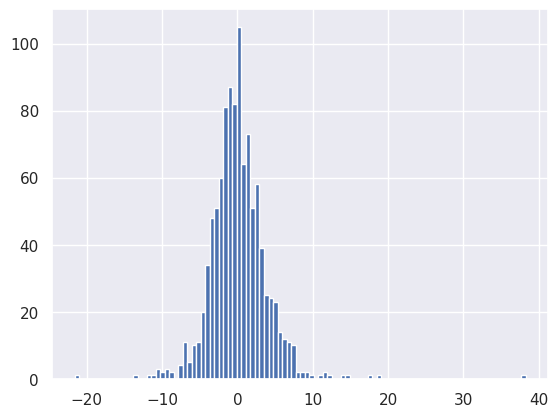

In [99]:
import seaborn as sns
sns.set()

df.Daily_Change.hist(bins=100)

<Axes: xlabel='Date'>

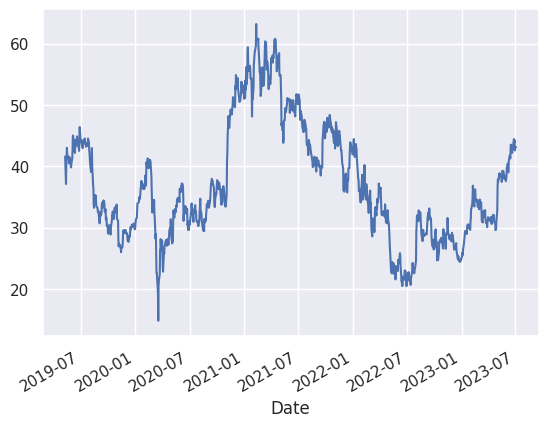

In [100]:
df.Close.plot()

### <a name='a7'></a> Filtrowanie danych

In [101]:
df

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.0000,41.06,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.2400,36.08,37.10,79442420,37.945,41.57,-10.752947
2019-05-14,38.31,39.9600,36.85,39.96,46661147,39.135,37.10,7.708895
2019-05-15,39.37,41.8800,38.95,41.29,36086065,40.330,39.96,3.328328
2019-05-16,41.48,44.0600,41.25,43.00,38115524,42.240,41.29,4.141439
...,...,...,...,...,...,...,...,...
2023-06-27,44.69,44.8300,43.75,43.83,29652066,44.260,44.42,-1.328231
2023-06-28,43.50,45.2400,43.32,44.24,28187374,43.870,43.83,0.935432
2023-06-29,44.09,44.2800,42.11,42.58,28595285,43.335,44.24,-3.752260


In [106]:
df_positive = df[df.Daily_Change > 0]
df_positive

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-14,38.31,39.9600,36.85,39.96,46661147,39.135,37.10,7.708895
2019-05-15,39.37,41.8800,38.95,41.29,36086065,40.330,39.96,3.328328
2019-05-16,41.48,44.0600,41.25,43.00,38115524,42.240,41.29,4.141439
2019-05-24,41.28,41.5100,40.50,41.51,8786751,41.395,40.47,2.569805
2019-05-31,41.15,41.5700,39.41,40.41,23209848,40.780,39.80,1.532663
...,...,...,...,...,...,...,...,...
2023-06-22,42.30,43.8700,42.21,42.81,19542077,42.555,42.66,0.351617
2023-06-23,42.59,43.7550,42.33,43.34,23186640,42.965,42.81,1.238028
2023-06-26,43.75,45.0400,43.68,44.42,33692974,44.085,43.34,2.491924


In [108]:
df_positive.Daily_Change.mean()

2.7383318800598677

In [107]:
df_negative = df[df.Daily_Change < 0]
df_negative

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57,-10.752947
2019-05-17,41.98,43.29,41.27,41.91,20225687,41.945,43.00,-2.534884
2019-05-20,41.19,41.68,39.46,41.59,29222330,41.390,41.91,-0.763541
2019-05-21,42.00,42.24,41.25,41.50,10802851,41.750,41.59,-0.216398
2019-05-22,41.05,41.28,40.50,41.25,9089469,41.150,41.50,-0.602410
...,...,...,...,...,...,...,...,...
2023-06-14,41.30,41.59,40.57,41.27,15077575,41.285,41.41,-0.338083
2023-06-20,42.77,43.47,42.02,42.17,19936203,42.470,43.52,-3.102022
2023-06-27,44.69,44.83,43.75,43.83,29652066,44.260,44.42,-1.328231


In [109]:
df_negative.Daily_Change.mean()

-2.4483912379181847

In [110]:
df.Close == df.High

Date
2019-05-10    False
2019-05-13    False
2019-05-14     True
2019-05-15    False
2019-05-16    False
              ...  
2023-06-27    False
2023-06-28    False
2023-06-29    False
2023-06-30    False
2023-07-03    False
Length: 1044, dtype: bool

In [111]:
df[df.Close == df.High]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,7.708895
2019-05-24,41.28,41.51,40.50,41.51,8786751,41.395,40.47,2.569805
2020-08-25,31.04,31.19,30.60,31.19,10056762,31.115,31.04,0.483247
2020-12-04,52.71,54.86,52.71,54.86,22207887,53.785,52.52,4.455446
2021-02-04,56.45,57.85,56.11,57.85,13847255,57.150,57.12,1.278011
2022-11-30,27.80,29.14,27.64,29.14,18177028,28.470,27.76,4.971182


In [112]:
df[df.Close == df.Low]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-08-12,39.84,39.95,37.00,37.00,20632310,38.420,40.05,-7.615481
2019-12-09,27.96,28.36,27.68,27.68,21098387,27.820,27.86,-0.646088
2019-12-27,30.80,31.06,30.17,30.17,18465965,30.485,30.67,-1.630258
2020-12-31,53.28,53.28,51.00,51.00,13282786,52.140,53.15,-4.045155
2021-12-31,42.53,43.12,41.93,41.93,13746893,42.230,42.66,-1.711205
2023-01-05,25.73,26.01,25.55,25.55,9942038,25.640,25.91,-1.389425
2023-05-16,37.93,38.15,37.44,37.44,21836864,37.685,38.14,-1.835343
2023-05-30,38.73,39.06,37.56,37.56,18143192,38.145,38.45,-2.314694


In [114]:
df.index > '2019-11-01'

array([False, False, False, ...,  True,  True,  True])

In [115]:
df[df.index > '2019-11-01']

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-11-04,31.45,31.7500,30.120,31.08,32330121,31.265,31.37,-0.924450
2019-11-05,29.13,29.3000,27.970,28.02,52180615,28.575,31.08,-9.845560
2019-11-06,26.06,27.5500,25.580,26.94,133569790,26.500,28.02,-3.854390
2019-11-07,26.80,27.4200,26.450,27.38,65949472,27.090,26.94,1.633259
2019-11-08,27.48,27.6200,26.915,27.01,45263118,27.245,27.38,-1.351351
...,...,...,...,...,...,...,...,...
2023-06-27,44.69,44.8300,43.750,43.83,29652066,44.260,44.42,-1.328231
2023-06-28,43.50,45.2400,43.320,44.24,28187374,43.870,43.83,0.935432
2023-06-29,44.09,44.2800,42.110,42.58,28595285,43.335,44.24,-3.752260


In [116]:
df[(df.index >= '2019-11-01') & (df.index < '2019-11-15')]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-11-01,31.45,31.70,30.7412,31.37,10460430,31.410,31.50,-0.412698
2019-11-04,31.45,31.75,30.1200,31.08,32330121,31.265,31.37,-0.924450
2019-11-05,29.13,29.30,27.9700,28.02,52180615,28.575,31.08,-9.845560
2019-11-06,26.06,27.55,25.5800,26.94,133569790,26.500,28.02,-3.854390
2019-11-07,26.80,27.42,26.4500,27.38,65949472,27.090,26.94,1.633259
2019-11-08,27.48,27.62,26.9150,27.01,45263118,27.245,27.38,-1.351351
2019-11-11,27.03,27.21,26.2300,27.14,41445732,27.085,27.01,0.481303
2019-11-12,27.38,27.66,26.6600,26.70,37095389,27.040,27.14,-1.621223
2019-11-13,26.47,26.82,26.1400,26.71,34512663,26.590,26.70,0.037453


In [117]:
df[(df.index == '2019-11-01') | (df.index == '2019-11-07')]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-11-01,31.45,31.70,30.7412,31.37,10460430,31.41,31.50,-0.412698
2019-11-07,26.80,27.42,26.4500,27.38,65949472,27.09,26.94,1.633259


In [118]:
df

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.0000,41.06,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.2400,36.08,37.10,79442420,37.945,41.57,-10.752947
2019-05-14,38.31,39.9600,36.85,39.96,46661147,39.135,37.10,7.708895
2019-05-15,39.37,41.8800,38.95,41.29,36086065,40.330,39.96,3.328328
2019-05-16,41.48,44.0600,41.25,43.00,38115524,42.240,41.29,4.141439
...,...,...,...,...,...,...,...,...
2023-06-27,44.69,44.8300,43.75,43.83,29652066,44.260,44.42,-1.328231
2023-06-28,43.50,45.2400,43.32,44.24,28187374,43.870,43.83,0.935432
2023-06-29,44.09,44.2800,42.11,42.58,28595285,43.335,44.24,-3.752260


In [119]:
df[df.index.month == 5]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.000,41.060,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.240,36.080,37.10,79442420,37.945,41.57,-10.752947
2019-05-14,38.31,39.960,36.850,39.96,46661147,39.135,37.10,7.708895
2019-05-15,39.37,41.880,38.950,41.29,36086065,40.330,39.96,3.328328
2019-05-16,41.48,44.060,41.250,43.00,38115524,42.240,41.29,4.141439
...,...,...,...,...,...,...,...,...
2023-05-24,38.05,38.660,37.770,37.96,22074721,38.005,38.66,-1.810657
2023-05-25,38.48,38.585,37.525,37.95,18634222,38.215,37.96,-0.026344
2023-05-26,38.24,38.760,38.220,38.45,14438769,38.345,37.95,1.317523


In [121]:
df[df.index.year == 2020]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2020-01-02,29.94,31.000,29.79,30.99,20583240,30.465,29.74,4.203093
2020-01-03,30.62,31.430,30.48,31.37,18831450,30.995,30.99,1.226202
2020-01-06,31.01,32.060,31.00,31.58,21215865,31.295,31.37,0.669429
2020-01-07,31.79,32.840,31.36,32.81,30268966,32.300,31.58,3.894870
2020-01-08,32.73,34.520,32.46,33.93,43955449,33.330,32.81,3.413593
...,...,...,...,...,...,...,...,...
2020-12-24,53.60,53.625,52.29,52.88,6316761,53.240,53.71,-1.545336
2020-12-28,53.02,53.130,51.56,51.97,12058981,52.495,52.88,-1.720877
2020-12-29,52.33,52.990,51.47,52.27,10140561,52.300,51.97,0.577256


In [120]:
df[df.index.day == 1]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-07-01,46.980,47.0400,44.0600,44.27,17739998,45.6250,46.38,-4.549375
2019-08-01,42.140,42.5355,41.0000,41.31,7349740,41.7250,42.14,-1.969625
2019-10-01,30.370,30.5100,28.6500,29.15,13448055,29.7600,30.47,-4.332130
2019-11-01,31.450,31.7000,30.7412,31.37,10460430,31.4100,31.50,-0.412698
2020-04-01,26.500,26.7670,24.8101,25.42,38538381,25.9600,27.92,-8.954155
2020-05-01,29.130,29.7200,28.3250,28.39,19290192,28.7600,30.27,-6.210770
2020-06-01,35.640,36.3900,35.1600,35.82,21893806,35.7300,36.32,-1.376652
2020-07-01,30.960,31.2650,30.1622,30.43,13611544,30.6950,31.08,-2.091377
2020-09-01,33.450,34.5100,33.1450,34.30,16026170,33.8750,33.63,1.992269
